In [3]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
import sqlite3

# Connect SQLite
conn = sqlite3.connect("creditcard.db")
df.to_sql("transactions", conn, if_exists="replace", index=False)

284807

In [6]:
import pandas as pd

# Example 1: Count total transactions
query = "SELECT COUNT(*) as total_transactions FROM transactions"
print(pd.read_sql(query, conn))

# Example 2: Count fraud vs non-fraud (assuming 'Class' column → 1 = Fraud, 0 = Not Fraud)
query = "SELECT Class, COUNT(*) as count FROM transactions GROUP BY Class"
print(pd.read_sql(query, conn))

# Example 3: Average transaction amount
query = "SELECT AVG(Amount) as avg_amount FROM transactions"
print(pd.read_sql(query, conn))

# Example 4: Highest transaction amounts
query = "SELECT * FROM transactions ORDER BY Amount DESC LIMIT 5"
print(pd.read_sql(query, conn))

   total_transactions
0              284807
   Class   count
0      0  284315
1      1     492
   avg_amount
0   88.349619
       Time         V1         V2         V3         V4          V5  \
0  166198.0 -35.548539 -31.850484 -48.325589  15.304184 -113.743307   
1   48401.0 -36.802320 -63.344698 -20.645794  16.715537  -20.672064   
2   95286.0 -34.549296 -60.464618 -21.340854  16.875344  -19.229075   
3   42951.0 -23.712839 -42.172688 -13.320825   9.925019  -13.945538   
4   46253.0 -21.780665 -38.305310 -12.122469   9.752791  -12.880794   

          V6          V7         V8        V9  ...        V21        V22  \
0  73.301626  120.589494 -27.347360 -3.872425  ... -21.620120   5.712303   
1   7.694002   24.956587  -4.730111 -2.687312  ...  11.455313 -10.933144   
2   6.335259   24.422716  -4.964566  0.188912  ...  11.502580  -9.499423   
3   5.564891   15.710644  -2.844253 -1.580725  ...   7.921600  -6.320710   
4   4.256017   14.785051  -2.818253 -0.667338  ...   7.437478  -5.6194

In [7]:
# Fraud vs Non-Fraud distribution
fraud_count = df['Class'].value_counts()
print("Fraud vs Non-Fraud Counts:\n", fraud_count)

# Fraud ratio
fraud_ratio = df['Class'].mean() * 100
print(f"Fraudulent Transaction Ratio: {fraud_ratio:.2f}%")

# Summary stats
print(df[['Amount']].describe())

# Correlation matrix
print(df.corr()['Class'].sort_values(ascending=False))

Fraud vs Non-Fraud Counts:
 Class
0    284315
1       492
Name: count, dtype: int64
Fraudulent Transaction Ratio: 0.17%
              Amount
count  284807.000000
mean       88.349619
std       250.120109
min         0.000000
25%         5.600000
50%        22.000000
75%        77.165000
max     25691.160000
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


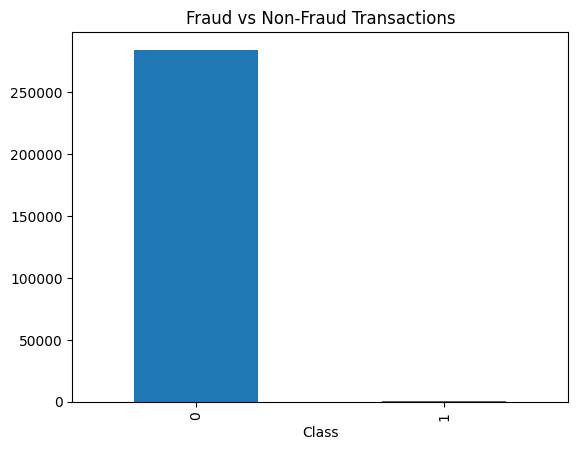

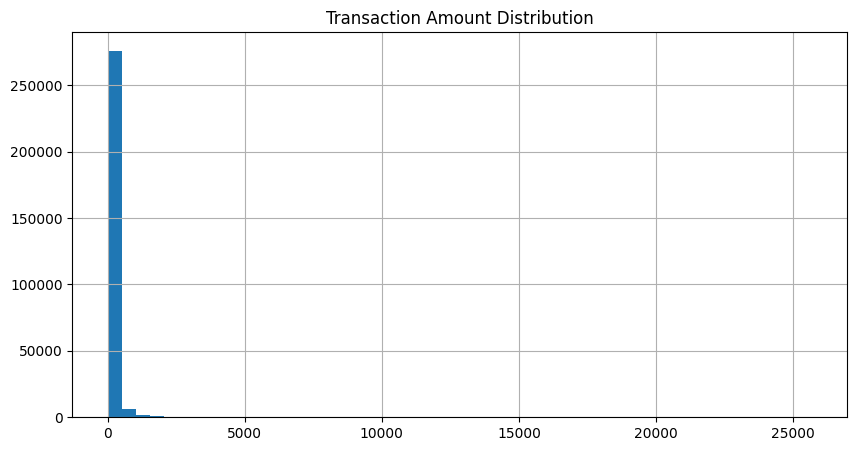

In [8]:
import matplotlib.pyplot as plt

# Fraud vs Non-Fraud Bar Plot
fraud_count.plot(kind="bar", title="Fraud vs Non-Fraud Transactions")
plt.show()

# Histogram of Transaction Amounts
df['Amount'].hist(bins=50, figsize=(10,5))
plt.title("Transaction Amount Distribution")
plt.show()

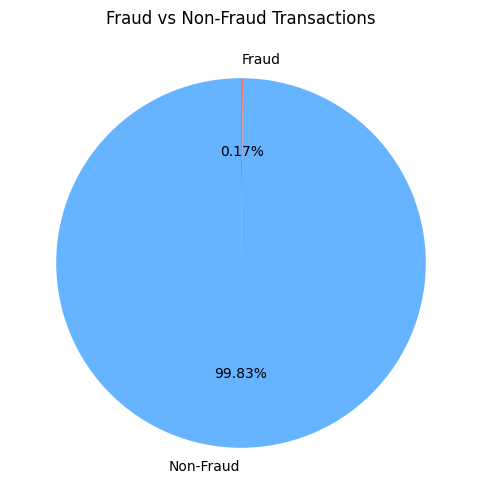

In [11]:
fraud_counts = df['Class'].value_counts()
labels = ['Non-Fraud', 'Fraud']
colors = ['#66b3ff','#ff6666']

plt.figure(figsize=(6,6))
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


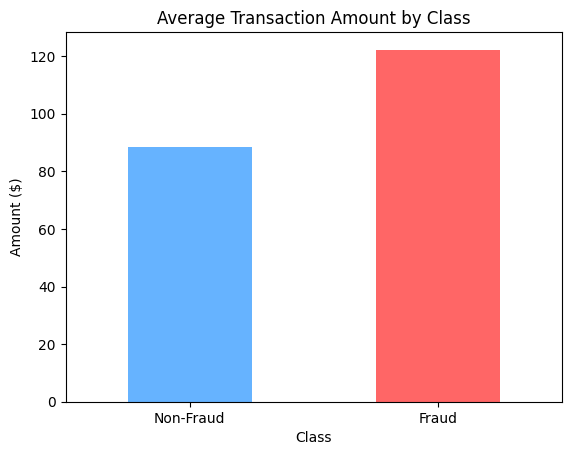

In [13]:
avg_amount = df.groupby('Class')['Amount'].mean()
avg_amount.plot(kind='bar', color=['#66b3ff','#ff6666'])
plt.title("Average Transaction Amount by Class")
plt.ylabel("Amount ($)")
plt.xticks(ticks=[0,1], labels=['Non-Fraud','Fraud'], rotation=0)
plt.show()


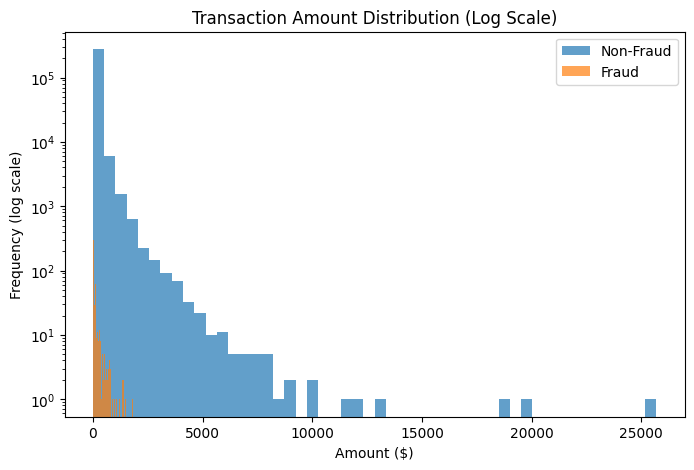

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df[df['Class']==0]['Amount'], bins=50, alpha=0.7, label='Non-Fraud')
plt.hist(df[df['Class']==1]['Amount'], bins=50, alpha=0.7, label='Fraud')
plt.yscale('log')
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.show()


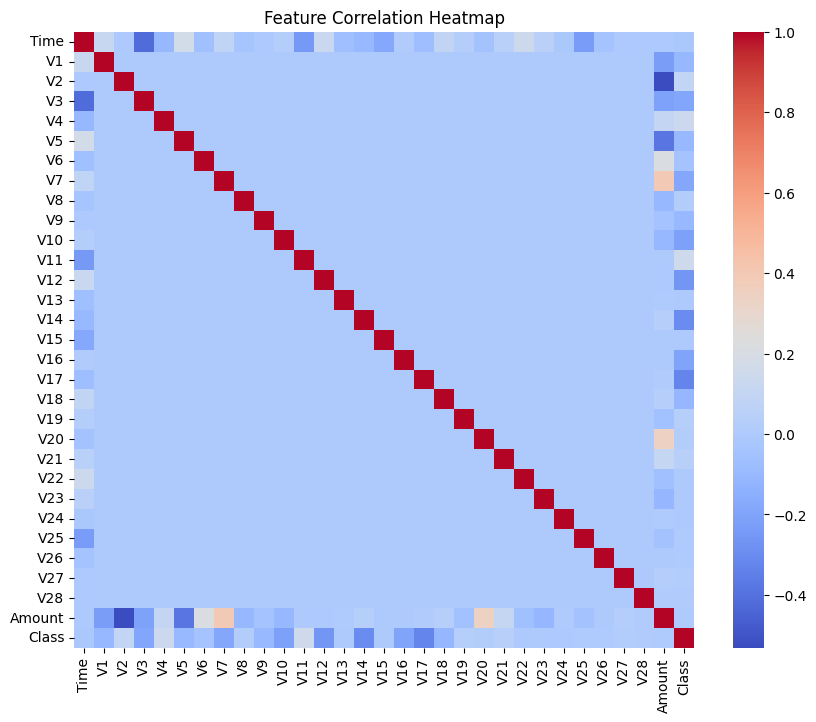

In [16]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
